# Wrapper Methods

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

In [2]:
# Load the data
obesity = pd.read_csv("obesity.csv")
# Inspect the data
print(obesity.head(10))

   Gender   Age  family_history_with_overweight  FAVC  FCVC  NCP  CAEC  SMOKE  \
0       0  21.0                               1     0   2.0  3.0     1      0   
1       0  21.0                               1     0   3.0  3.0     1      1   
2       1  23.0                               1     0   2.0  3.0     1      0   
3       1  27.0                               0     0   3.0  3.0     1      0   
4       1  22.0                               0     0   2.0  1.0     1      0   
5       1  29.0                               0     1   2.0  3.0     1      0   
6       0  23.0                               1     1   3.0  3.0     1      0   
7       1  22.0                               0     0   2.0  3.0     1      0   
8       1  24.0                               1     1   3.0  3.0     1      0   
9       1  22.0                               1     1   2.0  3.0     1      0   

   CH2O  SCC  FAF  TUE  CALC  Automobile  Bike  Motorbike  \
0   2.0    0  0.0  1.0     0           0     0 

In [3]:
# Split the data into predictor variables and an outcome variable
X = obesity.iloc[:,:-1]
y = obesity.iloc[:,[-1]]

In [16]:
# Create a logistic regression model
lr = LogisticRegression(max_iter=100)

# Fit the logistic regression model
lr.fit(X,y)

# Print the accuracy of the model
print(lr.score(X,y))

0.7669351018474656


c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Sequential Forward Selection

In [ ]:
# Create a sequential forward selection model
sfs = SFS(lr, k_features=9, forward=True, floating=False, scoring='accuracy', cv=0)

In [ ]:
# Fit the sequential forward selection model to X and y
sfs.fit(X,y)

In [ ]:
print(sfs.subsets_[9])

c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Number of Features', ylabel='Performance'>)

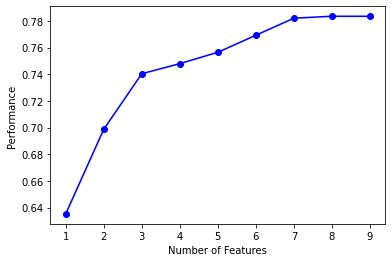

In [18]:
plot_sfs(sfs.get_metric_dict())

## Sequential Backward Selection

In [20]:
sbs = SFS(lr, 
          k_features=7, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=0)

In [ ]:
sbs.fit(X,y)



In [22]:
print(sbs.subsets_[7])

{'feature_idx': (1, 2, 3, 6, 9, 10, 16), 'cv_scores': array([0.77025107]), 'avg_score': 0.7702510658455708, 'feature_names': ('Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF', 'Public_Transportation')}


c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Number of Features', ylabel='Performance'>)

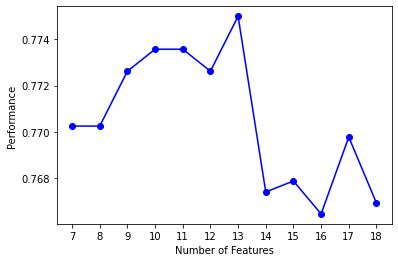

In [30]:
plot_sfs(sbs.get_metric_dict())

## Recursive Feature Elimination
First we’ll standardize the data, then we’ll fit the RFE model and inspect the results.

In [24]:
# Let's save an array with feature names for later
features = X.columns

In [26]:
# Standard normalization of features
X_norm = pd.DataFrame(StandardScaler().fit_transform(X))

In [27]:
# Create an RFE() object that selects 8 features
rfe = RFE(estimator=lr, n_features_to_select=8)
# Fit the Recursive Feature Elimination model
rfe.fit(X_norm, y)

c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: D

RFE(estimator=LogisticRegression(), n_features_to_select=8)

In [28]:
# Create a list of chosen feature names. 
# A list comprehension and filter the features in zip(features, rfe.support_) based on whether their support is True (meaning the model kept them) or False (meaning the model eliminated them)
[f for (f, support) in zip(features, rfe.support_) if support]

['Age',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'CAEC',
 'SCC',
 'Automobile',
 'Walking']

In [29]:
# Print the model accuracy after doing recursive feature elimination
print(rfe.score(X_norm, y))

0.7678825201326386
